In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

In [30]:
days = 500

## Generate Data

In [31]:
dates = pd.date_range(start='2018/01/01',periods=days)
df_dates = pd.Series(dates.strftime('%Y-%m-%d'))

In [32]:
sec1 = np.random.normal(5400,900,days).astype(int)
df_sec1 = pd.to_datetime(sec1,unit='s')
df_time1 = pd.Series(df_sec1.strftime('%H:%M:%S'))

In [33]:
sec2 = np.random.normal(18000,3600,days).astype(int)
df_sec2 = pd.to_datetime(sec2,unit='s')
df_time2 = pd.Series(df_sec2.strftime('%H:%M:%S'))

In [34]:
out_data = pd.DataFrame({'Date':df_dates,'StartTime':df_time1,'EndTime':df_time2},columns=['Date','StartTime','EndTime'])
out_data.set_index('Date',inplace=True)

## Processing

In [35]:
out_data

,StartTime,EndTime
Date,,
2018-01-01,01:46:48,05:57:34
2018-01-02,01:36:48,04:43:00
2018-01-03,01:18:17,06:20:52
2018-01-04,01:31:48,05:00:41
2018-01-05,01:00:09,03:38:39
2018-01-06,01:46:09,05:19:59
2018-01-07,01:14:30,05:16:22
2018-01-08,01:17:31,05:21:00
2018-01-09,01:22:19,04:11:56


In [36]:
#df['StartTime'] = pd.to_timedelta(df['StartTime'])
#df['EndTime'] = pd.to_timedelta(df['EndTime'])

In [37]:
out_data.dtypes

StartTime    object
EndTime      object
dtype: object

In [38]:
out_data.to_csv('D://Users//vachekka//Desktop//dump.csv',sep=',',header=True)

## Control Chart Logic

In [39]:
input = out_data.copy(deep=True)

In [40]:
input.dtypes

StartTime    object
EndTime      object
dtype: object

In [41]:
input

,StartTime,EndTime
Date,,
2018-01-01,01:46:48,05:57:34
2018-01-02,01:36:48,04:43:00
2018-01-03,01:18:17,06:20:52
2018-01-04,01:31:48,05:00:41
2018-01-05,01:00:09,03:38:39
2018-01-06,01:46:09,05:19:59
2018-01-07,01:14:30,05:16:22
2018-01-08,01:17:31,05:21:00
2018-01-09,01:22:19,04:11:56


In [42]:
idx_dates = pd.DatetimeIndex(data=input.index,freq='D')

In [43]:
input.set_index(idx_dates,inplace=True)

In [44]:
input.dtypes

StartTime    object
EndTime      object
dtype: object

In [45]:
input.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-11', '2019-05-12', '2019-05-13',
               '2019-05-14', '2019-05-15'],
              dtype='datetime64[ns]', name='Date', length=500, freq='D')

In [46]:
input['StartTime'] = pd.to_datetime(input['StartTime'],format='%H:%M:%S')
input['EndTime'] = pd.to_datetime(input['EndTime'],format='%H:%M:%S')

In [47]:
input

,StartTime,EndTime
Date,,
2018-01-01,1900-01-01 01:46:48,1900-01-01 05:57:34
2018-01-02,1900-01-01 01:36:48,1900-01-01 04:43:00
2018-01-03,1900-01-01 01:18:17,1900-01-01 06:20:52
2018-01-04,1900-01-01 01:31:48,1900-01-01 05:00:41
2018-01-05,1900-01-01 01:00:09,1900-01-01 03:38:39
2018-01-06,1900-01-01 01:46:09,1900-01-01 05:19:59
2018-01-07,1900-01-01 01:14:30,1900-01-01 05:16:22
2018-01-08,1900-01-01 01:17:31,1900-01-01 05:21:00
2018-01-09,1900-01-01 01:22:19,1900-01-01 04:11:56


In [48]:
input['duration']=(input['EndTime'] - input['StartTime'])

In [49]:
input

,StartTime,EndTime,duration
Date,,,
2018-01-01,1900-01-01 01:46:48,1900-01-01 05:57:34,04:10:46
2018-01-02,1900-01-01 01:36:48,1900-01-01 04:43:00,03:06:12
2018-01-03,1900-01-01 01:18:17,1900-01-01 06:20:52,05:02:35
2018-01-04,1900-01-01 01:31:48,1900-01-01 05:00:41,03:28:53
2018-01-05,1900-01-01 01:00:09,1900-01-01 03:38:39,02:38:30
2018-01-06,1900-01-01 01:46:09,1900-01-01 05:19:59,03:33:50
2018-01-07,1900-01-01 01:14:30,1900-01-01 05:16:22,04:01:52
2018-01-08,1900-01-01 01:17:31,1900-01-01 05:21:00,04:03:29
2018-01-09,1900-01-01 01:22:19,1900-01-01 04:11:56,02:49:37


In [50]:
input.dtypes

StartTime     datetime64[ns]
EndTime       datetime64[ns]
duration     timedelta64[ns]
dtype: object

In [51]:
input['duration_min'] = input['duration'] / pd.Timedelta('1 min')

In [52]:
input

,StartTime,EndTime,duration,duration_min
Date,,,,
2018-01-01,1900-01-01 01:46:48,1900-01-01 05:57:34,04:10:46,250.766667
2018-01-02,1900-01-01 01:36:48,1900-01-01 04:43:00,03:06:12,186.200000
2018-01-03,1900-01-01 01:18:17,1900-01-01 06:20:52,05:02:35,302.583333
2018-01-04,1900-01-01 01:31:48,1900-01-01 05:00:41,03:28:53,208.883333
2018-01-05,1900-01-01 01:00:09,1900-01-01 03:38:39,02:38:30,158.500000
2018-01-06,1900-01-01 01:46:09,1900-01-01 05:19:59,03:33:50,213.833333
2018-01-07,1900-01-01 01:14:30,1900-01-01 05:16:22,04:01:52,241.866667
2018-01-08,1900-01-01 01:17:31,1900-01-01 05:21:00,04:03:29,243.483333
2018-01-09,1900-01-01 01:22:19,1900-01-01 04:11:56,02:49:37,169.616667


In [53]:
input.dtypes

StartTime        datetime64[ns]
EndTime          datetime64[ns]
duration        timedelta64[ns]
duration_min            float64
dtype: object

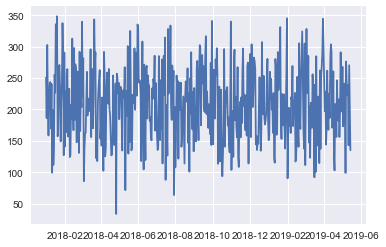

In [54]:
plt.plot(input.index,input['duration_min'])